# file server age report

This jupyter notebook will take CSV data showing details about files on a network share, and generate graphs based on file size and age.


# 1 - import required libraries

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt



# 2 - Load dataset into a Pandas DataFrame

In [3]:
#df = pd.read_csv('c:/temp/1/filenames.csv')  
df = pd.read_csv('https://raw.githubusercontent.com/nickjeffrey/GetFileDetails/filenames.csv')


In [4]:
# look at the top few rows of the data to confirm the labels are correct
df.head()

,Filename,Bytes,MegaBytes,GigaBytes,CreationTimeEpoch,CreationTimeDays,AccessTimeEpoch,AccessTimeDays,ModificationTimeEpoch,ModificationTimeDays,MD5sum
0,x:\xs9cvy_c9vy\x9hc_2_c9syvn_5kv11yd878.jpg,2314341,2,0,1330797994,4153,1527501836,1876,1330797994,4153,0
1,x:\xs9cvy_c9vy\x9hc_2_c9syvn_5kv11yd879.jpg,2680772,3,0,1330797994,4153,1527501836,1876,1330797994,4153,0
2,x:\xs9cvy_c9vy\x9hc_2_c9syvn_5kv11yd880.jpg,3057284,3,0,1330797996,4153,1527501836,1876,1330797996,4153,0
3,x:\xs9cvy_c9vy\x9hc_2_c9syvn_5kv11yd881.6yqcV,2960049,3,0,1330797996,4153,1527501836,1876,1330797996,4153,0
4,x:\xs9cvy_c9vy\x9hc_2_c9syvn_5kv11yd900.jpg,3178158,3,0,1330798008,4153,1527501836,1876,1330798008,4153,0


In [5]:
# look at the bottom few rows of the data 
df.tail()

,Filename,Bytes,MegaBytes,GigaBytes,CreationTimeEpoch,CreationTimeDays,AccessTimeEpoch,AccessTimeDays,ModificationTimeEpoch,ModificationTimeDays,MD5sum
99995,x:\ayt69vy\9vdfjc_c6tvw5\1._M9v7TcxfrS\q9v7dyl...,45969,0,0,1469794044,2544,1653919161,413,1470131623,2540,0
99996,x:\ayt69vy\9vdfjc_c6tvw5\1._M9v7TcxfrS\q9v7dyl...,53069,0,0,1470131650,2540,1653919161,413,1470757314,2533,0
99997,x:\ayt69vy\9vdfjc_c6tvw5\1._M9v7TcxfrS\q9v7dyl...,40770,0,0,1471254564,2527,1653919161,413,1471339790,2526,0
99998,x:\ayt69vy\9vdfjc_c6tvw5\1._M9v7TcxfrS\q9v7dyl...,38964,0,0,1471879288,2520,1653919161,413,1471944663,2519,0
99999,x:\ayt69vy\9vdfjc_c6tvw5\1._M9v7TcxfrS\q9v7dyl...,38795,0,0,1473150309,2505,1653919161,413,1473154651,2505,0


In [6]:
# show number of rows in dataset
print ("Rows in dataset:", len(df))

Rows in dataset: 100000


In [7]:
#view dimensions of dataset (rows and columns)
print ("Rows,columns in dataset:", df.shape)

Rows,columns in dataset: (100000, 11)


In [8]:
# check to see if there are any missing values from the dataset

# all of the results should be zero, which would indicate there are not any null values in the dataset
# if there are any results greater than zero, it would indicate that some pieces of data are missing and should be cleaned up.
df.isnull().sum()

Filename                 0
Bytes                    0
MegaBytes                0
GigaBytes                0
CreationTimeEpoch        0
CreationTimeDays         0
AccessTimeEpoch          0
AccessTimeDays           0
ModificationTimeEpoch    0
ModificationTimeDays     0
MD5sum                   0
dtype: int64

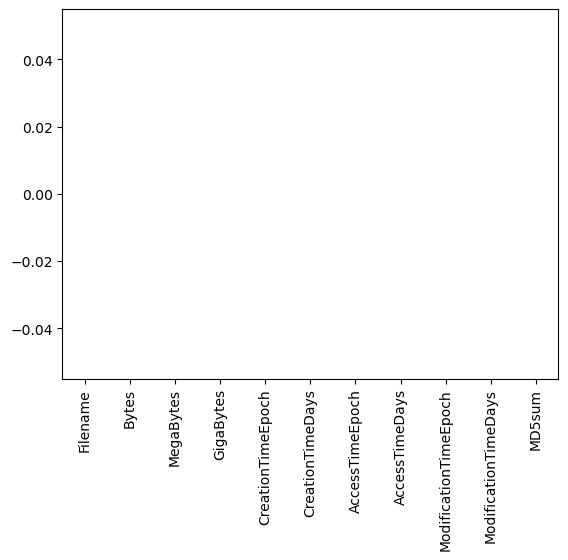

In [9]:
# visualize any missing values from the dataset in a histogram
# you want all the bars in the graph to be empty, which would indicate zero missing values

df.isnull().sum().plot.bar()
plt.show()

In [10]:
# another method to visalize missing values from dataset

print ("Checking for missing values in data set")

import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)


Checking for missing values in data set
No NAs found


In [11]:
#show the names of the columns (also called feature names)
df.columns

Index(['Filename', 'Bytes', 'MegaBytes', 'GigaBytes', 'CreationTimeEpoch',
       'CreationTimeDays', 'AccessTimeEpoch', 'AccessTimeDays',
       'ModificationTimeEpoch', 'ModificationTimeDays', 'MD5sum'],
      dtype='object')

In [12]:
#show summary info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Filename               100000 non-null  object
 1   Bytes                  100000 non-null  int64 
 2   MegaBytes              100000 non-null  int64 
 3   GigaBytes              100000 non-null  int64 
 4   CreationTimeEpoch      100000 non-null  int64 
 5   CreationTimeDays       100000 non-null  int64 
 6   AccessTimeEpoch        100000 non-null  int64 
 7   AccessTimeDays         100000 non-null  int64 
 8   ModificationTimeEpoch  100000 non-null  int64 
 9   ModificationTimeDays   100000 non-null  int64 
 10  MD5sum                 100000 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 8.4+ MB


In [13]:
# show data types 
df.dtypes

Filename                 object
Bytes                     int64
MegaBytes                 int64
GigaBytes                 int64
CreationTimeEpoch         int64
CreationTimeDays          int64
AccessTimeEpoch           int64
AccessTimeDays            int64
ModificationTimeEpoch     int64
ModificationTimeDays      int64
MD5sum                    int64
dtype: object

# 3 - dimensionality reduction by removing features 

In this example, we are dropping some of the columns from the dataset that are not useful.
Please note that this is more of a "data science" exercise than a machine learning exercise, so it isn't that these features have no predictive value for a ML algorithm.


In [14]:
# drop any redundant columns from the dataset which does not have any predictive power. 

#In this example, we have features for bytes,MegaBytes, Gigabytes.
# We really only need the bytes column, so get rid of the other two.
if 'MegaBytes' in df.columns: df.drop('MegaBytes', axis=1, inplace=True)
if 'GigaBytes' in df.columns: df.drop('GigaBytes', axis=1, inplace=True)


# we really only care about the ModificationTimeDays, so drop the other timestamps
if 'CreationTimeEpoch'     in df.columns: df.drop('CreationTimeEpoch',     axis=1, inplace=True)
if 'CreationTimeDays'      in df.columns: df.drop('CreationTimeDays',      axis=1, inplace=True)
if 'AccessTimeEpoch'       in df.columns: df.drop('AccessTimeEpoch',       axis=1, inplace=True)
if 'AccessTimeDays'        in df.columns: df.drop('AccessTimeDays',        axis=1, inplace=True)
if 'ModificationTimeEpoch' in df.columns: df.drop('ModificationTimeEpoch', axis=1, inplace=True)

# There is a column for the MD5 checksum of each file, but at the moment, we only care about file age, so drop MD5sum
if 'MD5sum' in df.columns: df.drop('MD5sum', axis=1, inplace=True)



In [15]:
#Look at the dataset again, you should see several columns have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Filename              100000 non-null  object
 1   Bytes                 100000 non-null  int64 
 2   ModificationTimeDays  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [16]:
# At this point, we have 3 columns: Filename, Bytes, ModificationTimeDays
# look at the top few rows of the data to confirm the labels are correct
df.head()

,Filename,Bytes,ModificationTimeDays
0,x:\xs9cvy_c9vy\x9hc_2_c9syvn_5kv11yd878.jpg,2314341,4153
1,x:\xs9cvy_c9vy\x9hc_2_c9syvn_5kv11yd879.jpg,2680772,4153
2,x:\xs9cvy_c9vy\x9hc_2_c9syvn_5kv11yd880.jpg,3057284,4153
3,x:\xs9cvy_c9vy\x9hc_2_c9syvn_5kv11yd881.6yqcV,2960049,4153
4,x:\xs9cvy_c9vy\x9hc_2_c9syvn_5kv11yd900.jpg,3178158,4153


In [17]:
# drop rows to make the dataset a bit faster during testing
# Let's say we want to drop all rows between indices 10000 and 999999 inclusive. 
# We can do this with the drop() function and the range() function to generate the indices:
# df.drop(range(10000, 1000000), inplace=True)

In [18]:
#view dimensions of dataset (rows and columns)
print ("Rows,columns in dataset:", df.shape)

Rows,columns in dataset: (100000, 3)


In [19]:
# At this point, we have 3 columns: Filename, Bytes, ModificationTimeDays
# look at the bottom few rows of the data to confirm the labels are correct
df.tail()

,Filename,Bytes,ModificationTimeDays
99995,x:\ayt69vy\9vdfjc_c6tvw5\1._M9v7TcxfrS\q9v7dyl...,45969,2540
99996,x:\ayt69vy\9vdfjc_c6tvw5\1._M9v7TcxfrS\q9v7dyl...,53069,2533
99997,x:\ayt69vy\9vdfjc_c6tvw5\1._M9v7TcxfrS\q9v7dyl...,40770,2526
99998,x:\ayt69vy\9vdfjc_c6tvw5\1._M9v7TcxfrS\q9v7dyl...,38964,2519
99999,x:\ayt69vy\9vdfjc_c6tvw5\1._M9v7TcxfrS\q9v7dyl...,38795,2505


# 4 - Categorize filenames by age

In [20]:
# show a list of all the filenames with age 0 to  90 days old by extracting all rows with ModificationTimeDays <= 90
age0to90days = (df[(df['ModificationTimeDays'] >= 0) & (df['ModificationTimeDays'] < 90)])
print("Number of files with last modification date   0 to  90  days: ", (len(age0to90days)) )

# show a list of all the filenames with age 90 to 180 days
age90to180days = (df[(df['ModificationTimeDays'] >= 90) & (df['ModificationTimeDays'] < 180)])
print("Number of files with last modification date  90 to 180  days: ", (len(age90to180days)) )

# show a list of all the filenames with age 180 to 365 days
age180to365days = (df[(df['ModificationTimeDays'] >= 180) & (df['ModificationTimeDays'] < 365)])
print("Number of files with last modification date 180 to 365  days: ", (len(age180to365days)) )

# show a list of all the filenames with age 1 to 2 years days
age1to2years = (df[(df['ModificationTimeDays'] >= (365*1)) & (df['ModificationTimeDays'] < (365*2))])
print("Number of files with last modification date   1 to   2 years: ", (len(age1to2years)) )

# show a list of all the filenames with age 2 to 3 years days
age2to3years = (df[(df['ModificationTimeDays'] >= (365*2)) & (df['ModificationTimeDays'] < (365*3))])
print("Number of files with last modification date   2 to   3 years: ", (len(age2to3years)) )

# show a list of all the filenames with age 3 to 5 years days
age3to5years = (df[(df['ModificationTimeDays'] >= (365*3)) & (df['ModificationTimeDays'] < (365*5))])
print("Number of files with last modification date   3 to   5 years: ", (len(age3to5years)) )

# show a list of all the filenames with age 5 to 99 years days
age5to99years = (df[(df['ModificationTimeDays'] >= (365*5)) & (df['ModificationTimeDays'] < (365*99))])
print("Number of files with last modification date   5 to  99 years: ", (len(age5to99years)) )



Number of files with last modification date   0 to  90  days:  1571
Number of files with last modification date  90 to 180  days:  1903
Number of files with last modification date 180 to 365  days:  2377
Number of files with last modification date   1 to   2 years:  4089
Number of files with last modification date   2 to   3 years:  1427
Number of files with last modification date   3 to   5 years:  16872
Number of files with last modification date   5 to  99 years:  71761


<AxesSubplot:title={'center':'Filename counts by age'}, xlabel='Last Modification Date', ylabel='Number of files'>

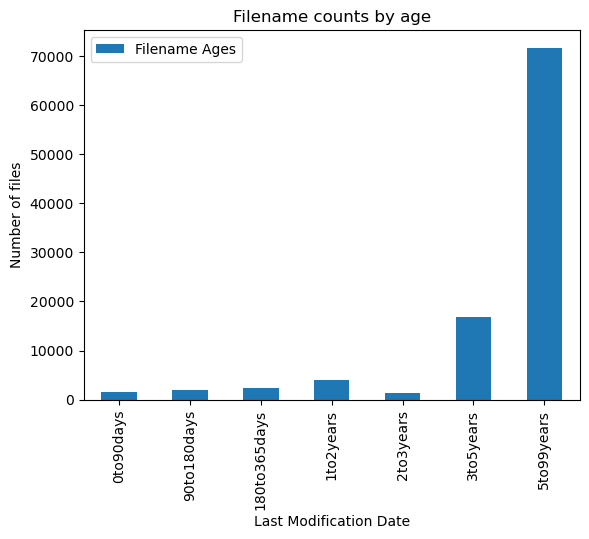

In [21]:
# create a bar graph with these vertical columns:
# age0to90days
# age90to180days
# age180to365days
# age1to2years
# age2to3years
# age3to5years
# age5to99years


# Create a Pandas series from a list of values ("[]") and plot it:
#pd.Series([len(age0to90days), len(age90to180days), len(age180to365days), len(age1to2years), len(age2to3years), len(age3to5years), len(age5to99years)]).plot(kind="bar")
#pd.Series([1, 2, 3, 4, 5, 6, 7]).plot(kind="bar")

# Create a sample dataframe with a text index
plotdata = pd.DataFrame({"Filename Ages": [len(age0to90days), len(age90to180days), len(age180to365days), len(age1to2years), len(age2to3years), len(age3to5years), len(age5to99years)]}, index=["0to90days", "90to180days", "180to365days", "1to2years", "2to3years", "3to5years", "5to99years"])
# Plot a bar chart
#plt.title("Filename counts by age")
#plt.xlabel("File age")
#plt.ylabel("Number of files")
plotdata.plot(kind="bar",title="Filename counts by age",xlabel="Last Modification Date",ylabel="Number of files")

# To do: 
# see if you can show the vertical axis in "thousands of files" (ie adjust the scale)


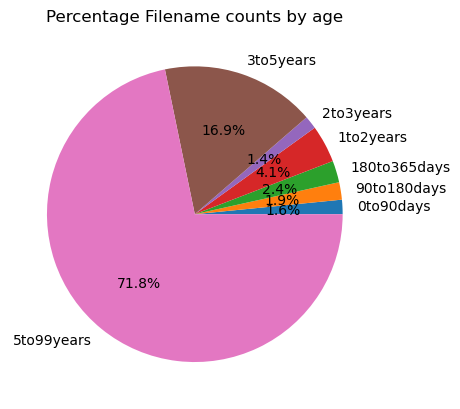

In [22]:
# create pie chart using the same data as the previous bar chart

labels = "0to90days", "90to180days", "180to365days", "1to2years", "2to3years", "3to5years", "5to99years"
sizes  = [len(age0to90days), len(age90to180days), len(age180to365days), len(age1to2years), len(age2to3years), len(age3to5years), len(age5to99years)]

plt.title("Percentage Filename counts by age")
#plt.xlabel("Age")
#plt.ylabel("Bytes")
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
#plt.legend()
plt.show()


# 5 - calculate total bytes for each category of files
(this section is time consuming if you have a lot of rows in the dataset)

In [23]:
# figure out the total number of bytes for each file category

# initialize variables
bytes0to90days    = 0
bytes90to180days  = 0
bytes180to365days = 0
bytes1to2years    = 0
bytes2to3years    = 0
bytes3to5years    = 0
bytes5to99years   = 0


# loop through the contents of the dataframe to find the total number of bytes for each file age category
for i in range(0,len(df)):
    if (i % 100000 == 0): print("Processed ", i, "files ", df.Filename[i], df.Bytes[i], df.ModificationTimeDays[i]) # print debug output every 100000 lines
    if (df.ModificationTimeDays[i] >=0       and df.ModificationTimeDays[i] <  90):      bytes0to90days    += df.Bytes[i]
    if (df.ModificationTimeDays[i] >=90      and df.ModificationTimeDays[i] < 180):      bytes90to180days  += df.Bytes[i]
    if (df.ModificationTimeDays[i] >=180     and df.ModificationTimeDays[i] < 365):      bytes180to365days += df.Bytes[i]
    if (df.ModificationTimeDays[i] >=(365*1) and df.ModificationTimeDays[i] < (365*2)):  bytes1to2years    += df.Bytes[i]
    if (df.ModificationTimeDays[i] >=(365*2) and df.ModificationTimeDays[i] < (365*3)):  bytes2to3years    += df.Bytes[i]
    if (df.ModificationTimeDays[i] >=(365*3) and df.ModificationTimeDays[i] < (365*5)):  bytes3to5years    += df.Bytes[i]
    if (df.ModificationTimeDays[i] >=(365*5) and df.ModificationTimeDays[i] < (365*99)): bytes5to99years   += df.Bytes[i]


   


Processed  0 files  x:\xs9cvy_c9vy\x9hc_2_c9syvn_5kv11yd878.jpg 2314341 4153


In [24]:
print("Bytes with last modification date   0 to  90  days: ", bytes0to90days    )        
print("Bytes with last modification date  90 to 180  days: ", bytes90to180days  )        
print("Bytes with last modification date 180 to 365  days: ", bytes180to365days )        
print("Bytes with last modification date   1 to   2 years: ", bytes1to2years    )        
print("Bytes with last modification date   2 to   3 years: ", bytes2to3years    )        
print("Bytes with last modification date   3 to   5 years: ", bytes3to5years    )        
print("Bytes with last modification date   5 to  99 years: ", bytes5to99years   )        


Bytes with last modification date   0 to  90  days:  3848887851
Bytes with last modification date  90 to 180  days:  35492838291
Bytes with last modification date 180 to 365  days:  5987213341
Bytes with last modification date   1 to   2 years:  9513398027
Bytes with last modification date   2 to   3 years:  1001406712
Bytes with last modification date   3 to   5 years:  56800590490
Bytes with last modification date   5 to  99 years:  97731858820


In [25]:
# convert bytes to more human-readable megabytes for graphing
# use int() to convert the floating point value to the nearest integer (nearest GB is close enough)
Mbytes0to90days    = int(bytes0to90days/1024/1024)
Mbytes90to180days  = int(bytes90to180days/1024/1024)
Mbytes180to365days = int(bytes180to365days/1024/1024)
Mbytes1to2years    = int(bytes1to2years/1024/1024)
Mbytes2to3years    = int(bytes2to3years/1024/1024)
Mbytes3to5years    = int(bytes3to5years/1024/1024)
Mbytes5to99years   = int(bytes5to99years/1024/1024)


In [26]:
print("MegaBytes with last modification date   0 to  90  days: ", Mbytes0to90days    )        
print("MegaBytes with last modification date  90 to 180  days: ", Mbytes90to180days  )        
print("MegaBytes with last modification date 180 to 365  days: ", Mbytes180to365days )        
print("MegaBytes with last modification date   1 to   2 years: ", Mbytes1to2years    )        
print("MegaBytes with last modification date   2 to   3 years: ", Mbytes2to3years    )        
print("MegaBytes with last modification date   3 to   5 years: ", Mbytes3to5years    )        
print("MegaBytes with last modification date   5 to  99 years: ", Mbytes5to99years   ) 

MegaBytes with last modification date   0 to  90  days:  3670
MegaBytes with last modification date  90 to 180  days:  33848
MegaBytes with last modification date 180 to 365  days:  5709
MegaBytes with last modification date   1 to   2 years:  9072
MegaBytes with last modification date   2 to   3 years:  955
MegaBytes with last modification date   3 to   5 years:  54169
MegaBytes with last modification date   5 to  99 years:  93204


In [27]:
# convert bytes to more human-readable gigabytes for graphing
# use int() to convert the floating point value to the nearest integer (nearest MB is close enough)
Gbytes0to90days    = int(bytes0to90days/1024/1024/1024)
Gbytes90to180days  = int(bytes90to180days/1024/1024/1024)
Gbytes180to365days = int(bytes180to365days/1024/1024/1024)
Gbytes1to2years    = int(bytes1to2years/1024/1024/1024)
Gbytes2to3years    = int(bytes2to3years/1024/1024/1024)
Gbytes3to5years    = int(bytes3to5years/1024/1024/1024)
Gbytes5to99years   = int(bytes5to99years/1024/1024/1024)

In [28]:
print("GigaBytes with last modification date   0 to  90  days: ", Gbytes0to90days    )        
print("GigaBytes with last modification date  90 to 180  days: ", Gbytes90to180days  )        
print("GigaBytes with last modification date 180 to 365  days: ", Gbytes180to365days )        
print("GigaBytes with last modification date   1 to   2 years: ", Gbytes1to2years    )        
print("GigaBytes with last modification date   2 to   3 years: ", Gbytes2to3years    )        
print("GigaBytes with last modification date   3 to   5 years: ", Gbytes3to5years    )        
print("GigaBytes with last modification date   5 to  99 years: ", Gbytes5to99years   )        


GigaBytes with last modification date   0 to  90  days:  3
GigaBytes with last modification date  90 to 180  days:  33
GigaBytes with last modification date 180 to 365  days:  5
GigaBytes with last modification date   1 to   2 years:  8
GigaBytes with last modification date   2 to   3 years:  0
GigaBytes with last modification date   3 to   5 years:  52
GigaBytes with last modification date   5 to  99 years:  91


In [29]:
# convert bytes to more human-readable terabytes for graphing
# use int() to convert the floating point value to the nearest integer (nearest TB is close enough)
Tbytes0to90days    = int(bytes0to90days/1024/1024/1024/1024)
Tbytes90to180days  = int(bytes90to180days/1024/1024/1024/1024)
Tbytes180to365days = int(bytes180to365days/1024/1024/1024/1024)
Tbytes1to2years    = int(bytes1to2years/1024/1024/1024/1024)
Tbytes2to3years    = int(bytes2to3years/1024/1024/1024/1024)
Tbytes3to5years    = int(bytes3to5years/1024/1024/1024/1024)
Tbytes5to99years   = int(bytes5to99years/1024/1024/1024/1024)

In [30]:
print("TeraBytes with last modification date   0 to  90  days: ", Tbytes0to90days    )        
print("TeraBytes with last modification date  90 to 180  days: ", Tbytes90to180days  )        
print("TeraBytes with last modification date 180 to 365  days: ", Tbytes180to365days )        
print("TeraBytes with last modification date   1 to   2 years: ", Tbytes1to2years    )        
print("TeraBytes with last modification date   2 to   3 years: ", Tbytes2to3years    )        
print("TeraBytes with last modification date   3 to   5 years: ", Tbytes3to5years    )        
print("TeraBytes with last modification date   5 to  99 years: ", Tbytes5to99years   )     

TeraBytes with last modification date   0 to  90  days:  0
TeraBytes with last modification date  90 to 180  days:  0
TeraBytes with last modification date 180 to 365  days:  0
TeraBytes with last modification date   1 to   2 years:  0
TeraBytes with last modification date   2 to   3 years:  0
TeraBytes with last modification date   3 to   5 years:  0
TeraBytes with last modification date   5 to  99 years:  0


In [31]:
# convert bytes to more human-readable petabytes for graphing
# use int() to convert the floating point value to the nearest integer (nearest PB is close enough)
Pbytes0to90days    = int(bytes0to90days/1024/1024/1024/1024/1024)
Pbytes90to180days  = int(bytes90to180days/1024/1024/1024/1024/1024)
Pbytes180to365days = int(bytes180to365days/1024/1024/1024/1024/1024)
Pbytes1to2years    = int(bytes1to2years/1024/1024/1024/1024/1024)
Pbytes2to3years    = int(bytes2to3years/1024/1024/1024/1024/1024)
Pbytes3to5years    = int(bytes3to5years/1024/1024/1024/1024/1024)
Pbytes5to99years   = int(bytes5to99years/1024/1024/1024/1024/1024)

In [32]:
print("PetaBytes with last modification date   0 to  90  days: ", Pbytes0to90days    )        
print("PetaBytes with last modification date  90 to 180  days: ", Pbytes90to180days  )        
print("PetaBytes with last modification date 180 to 365  days: ", Pbytes180to365days )        
print("PetaBytes with last modification date   1 to   2 years: ", Pbytes1to2years    )        
print("PetaBytes with last modification date   2 to   3 years: ", Pbytes2to3years    )        
print("PetaBytes with last modification date   3 to   5 years: ", Pbytes3to5years    )        
print("PetaBytes with last modification date   5 to  99 years: ", Pbytes5to99years   ) 

PetaBytes with last modification date   0 to  90  days:  0
PetaBytes with last modification date  90 to 180  days:  0
PetaBytes with last modification date 180 to 365  days:  0
PetaBytes with last modification date   1 to   2 years:  0
PetaBytes with last modification date   2 to   3 years:  0
PetaBytes with last modification date   3 to   5 years:  0
PetaBytes with last modification date   5 to  99 years:  0


In [33]:
# Based on the byte counts, figure out the preferred unit value (Bytes, MegaBytes, GigaBytes, TeraBytes) to use for graphing
if (bytes0to90days  >= 0):  y_axis_units = "Bytes"  #start with default value of bytes
if (Mbytes0to90days >= 10): y_axis_units = "MegaBytes"
if (Gbytes0to90days >= 10): y_axis_units = "GigaBytes"
if (Tbytes0to90days >= 10): y_axis_units = "TeraBytes"
if (Pbytes0to90days >= 10): y_axis_units = "PetaBytes"
print ("Based on file sizes, the vertical y-axis units will be shown in ", y_axis_units)

Based on file sizes, the vertical y-axis units will be shown in  MegaBytes


<AxesSubplot:title={'center':'Byte counts by age'}, xlabel='Last Modification Date', ylabel='MegaBytes'>

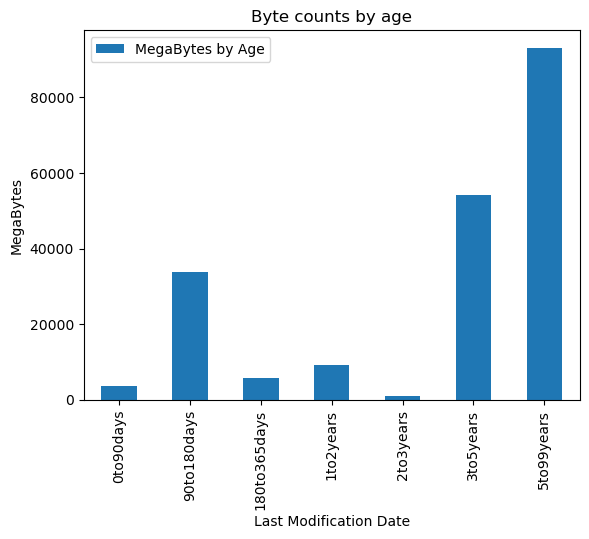

In [34]:
# create a bar graph with these vertical columns:
# bytes0to90days
# bytes90to180days
# bytes180to365days
# bytes1to2years
# bytes2to3years
# bytes3to5years
# bytes5to99years

#

# Create a Pandas series from a list of values ("[]") and plot it:
#pd.Series([bytes0to90days, bytes90to180days, bytes180to365days, bytes1to2years, bytes2to3years, bytes3to5years, age5to99years]).plot(kind="bar")
#pd.Series([1, 2, 3, 4, 5, 6, 7]).plot(kind="bar")

# Create a sample dataframe with a text index
if (y_axis_units == "Bytes"):     plotdata = pd.DataFrame({"Bytes by Age":     [ bytes0to90days,  bytes90to180days,  bytes180to365days,  bytes1to2years,  bytes2to3years,  bytes3to5years,  bytes5to99years]}, index=["0to90days", "90to180days", "180to365days", "1to2years", "2to3years", "3to5years", "5to99years"])
if (y_axis_units == "MegaBytes"): plotdata = pd.DataFrame({"MegaBytes by Age": [Mbytes0to90days, Mbytes90to180days, Mbytes180to365days, Mbytes1to2years, Mbytes2to3years, Mbytes3to5years, Mbytes5to99years]}, index=["0to90days", "90to180days", "180to365days", "1to2years", "2to3years", "3to5years", "5to99years"])
if (y_axis_units == "GigaBytes"): plotdata = pd.DataFrame({"GigaBytes by Age": [Gbytes0to90days, Gbytes90to180days, Gbytes180to365days, Gbytes1to2years, Gbytes2to3years, Gbytes3to5years, Gbytes5to99years]}, index=["0to90days", "90to180days", "180to365days", "1to2years", "2to3years", "3to5years", "5to99years"])
if (y_axis_units == "TeraBytes"): plotdata = pd.DataFrame({"TeraBytes by Age": [Tbytes0to90days, Tbytes90to180days, Tbytes180to365days, Tbytes1to2years, Tbytes2to3years, Tbytes3to5years, Tbytes5to99years]}, index=["0to90days", "90to180days", "180to365days", "1to2years", "2to3years", "3to5years", "5to99years"])        
if (y_axis_units == "PetaBytes"): plotdata = pd.DataFrame({"PetaBytes by Age": [Pbytes0to90days, Pbytes90to180days, Pbytes180to365days, Pbytes1to2years, Pbytes2to3years, Pbytes3to5years, Pbytes5to99years]}, index=["0to90days", "90to180days", "180to365days", "1to2years", "2to3years", "3to5years", "5to99years"])        

# plot the data
plotdata.plot(kind="bar",title="Byte counts by age",xlabel="Last Modification Date",ylabel=y_axis_units)



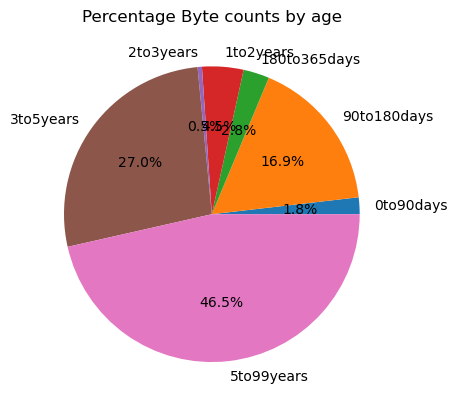

In [35]:
# create pie chart using the same data as the previous bar chart

labels = "0to90days", "90to180days", "180to365days", "1to2years", "2to3years", "3to5years", "5to99years"
sizes  = [bytes0to90days, bytes90to180days, bytes180to365days, bytes1to2years, bytes2to3years, bytes3to5years, bytes5to99years]

plt.title("Percentage Byte counts by age")
#plt.xlabel("Age")
#plt.ylabel("GigaBytes")
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
#plt.legend()
plt.show()

# Create reports


In [36]:

# Generate reports in CSV format showing the list of filenames, bytes, ModificationTimeDays

csv_output_file = 'c:/temp/report_0to90days.csv'
df_output_file  = df[ (df['ModificationTimeDays'] >= 0)        & (df['ModificationTimeDays'] < 90)]  
print ("Creating CSV output file showing all filenames with ages at:", csv_output_file)
df_output_file.to_csv(csv_output_file)

csv_output_file = 'c:/temp/report_90to180days.csv'
df_output_file  = df[ (df['ModificationTimeDays'] >= 90)     & (df['ModificationTimeDays'] < 180)]  
print ("Creating CSV output file showing all filenames with ages at:", csv_output_file)
df_output_file.to_csv(csv_output_file)

csv_output_file = 'c:/temp/report_180to365days.csv'
df_output_file = df[ (df['ModificationTimeDays'] >= 180)   & (df['ModificationTimeDays'] < 365)]  
print ("Creating CSV output file showing all filenames with ages at:", csv_output_file)
df_output_file.to_csv(csv_output_file)

csv_output_file = 'c:/temp/report_1to2years.csv'
df_output_file = df[ (df['ModificationTimeDays'] >= (365*1))  & (df['ModificationTimeDays'] < (365*2))]  
print ("Creating CSV output file showing all filenames with ages at:", csv_output_file)
df_output_file.to_csv(csv_output_file)

csv_output_file = 'c:/temp/report_2to3years.csv'
df_output_file = df[ (df['ModificationTimeDays'] >= (365*2))  & (df['ModificationTimeDays'] < (365*3))]  
print ("Creating CSV output file showing all filenames with ages at:", csv_output_file)
df_output_file.to_csv(csv_output_file)

csv_output_file = 'c:/temp/report_3to5years.csv'
df_output_file = df[ (df['ModificationTimeDays'] >= (365*3))  & (df['ModificationTimeDays'] < (365*5))]  
print ("Creating CSV output file showing all filenames with ages at:", csv_output_file)
df_output_file.to_csv(csv_output_file)

csv_output_file = 'c:/temp/report_5to99years.csv'
df_output_file= df[ (df['ModificationTimeDays'] >= (365*5)) & (df['ModificationTimeDays'] < (365*99))]  
print ("Creating CSV output file showing all filenames with ages at:", csv_output_file)
df_output_file.to_csv(csv_output_file)

                                                               



Creating CSV output file showing all filenames with ages at: c:/temp/report_0to90days.csv
Creating CSV output file showing all filenames with ages at: c:/temp/report_90to180days.csv
Creating CSV output file showing all filenames with ages at: c:/temp/report_180to365days.csv
Creating CSV output file showing all filenames with ages at: c:/temp/report_1to2years.csv
Creating CSV output file showing all filenames with ages at: c:/temp/report_2to3years.csv
Creating CSV output file showing all filenames with ages at: c:/temp/report_3to5years.csv
Creating CSV output file showing all filenames with ages at: c:/temp/report_5to99years.csv
